## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Тибилов Таймураз_

### Общая информация

__Дата выдачи:__ 05.03.2020

__Дедлайн:__ 19.03.2020 23:59

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.


__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния


Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [253]:
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [263]:
def euclidian_metric(X, x):
    distances = np.sqrt(((X - x) ** 2).sum(axis=1))
    return distances

def manhattan_metric(X, x):
    distances = (np.abs((X - x))).sum(axis=1)
    return distances

In [264]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [265]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        self.metrics = {
            'euclid': euclidian_metric,
            'manhattan': manhattan_metric,
        }

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """
        self.X_train = X_train
        self.y_train = y_train

        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = []
        for x in X_test:
            dist = self.metrics[self.metric](self.X_train, x)
            maxes = dist.argsort()[-self.k:][::-1]
            arr = y_train[maxes]
            u, indices = np.unique(arr, return_inverse=True)
            y_pred.append(u[np.argmax(np.bincount(indices))])


        return np.array(y_pred)

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [269]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [289]:
my_knn = KNN() 
my_knn.fit(X_train, y_train)
my_pred = my_knn.predict(X_test)
sk_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
sk_knn.fit(X_train, y_train)
sk_pred = sk_knn.predict(X_test)
mean_squared_error(my_pred, sk_pred, squared=False)

1.1704144800595788

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [153]:
data = pd.read_csv('train.csv', header=0)

In [24]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
data.drop('Id', axis=1, inplace=True)
sale_price = data['SalePrice']

## 1

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [148]:
null_data = data[data.isnull().any()[data.isnull().any()].index].isnull()
print('Количество пропусков: ')
print(null_data.sum())
print('\n\nДоля пропусков: ')
print(null_data.sum() / null_data.shape[0])

Количество пропусков: 
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Доля пропусков: 
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


## 2

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [155]:
# plt.hist(null_data.LotFrontage) # best is mean
# plt.hist(null_data.MasVnrArea) # best is median
# plt.hist(null_data.GarageYrBlt) # best is median
data.loc[data.LotFrontage.isna(),'LotFrontage'] = data['LotFrontage'].mean()
data.loc[data.MasVnrArea.isna(), 'MasVnrArea'] = data['MasVnrArea'].median()
data.loc[data.GarageYrBlt.isna(), 'GarageYrBlt'] = data['GarageYrBlt'].median()

data.loc[data.MasVnrType.isna(), 'MasVnrType'] = 'None' # most popular
data['Alley'] = data['Alley'].map({np.nan: 0, 'Grvl': 1, 'Pave': 1}) # 1 if has, 0 otherwise
data['BsmtQual'] = data['BsmtQual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality
data['BsmtCond'] = data['BsmtCond'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality
data['FireplaceQu'] = data['FireplaceQu'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality
data['BsmtExposure'] = data['BsmtExposure'].map({np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}) # ordered by quality
data['BsmtFinType1'] = data['BsmtFinType1'].map({np.nan: 0, 'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'LwQ': 2}) # ordered by quality
data['BsmtFinType2'] = data['BsmtFinType2'].map({np.nan: 0, 'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'LwQ': 2}) # ordered by quality
data.loc[data.Electrical.isna(), 'Electrical'] = 'SBrkr' # most popular
data.loc[data.GarageType.isna(), 'GarageType'] = 'NoGarage' # there are no order
data['GarageFinish'] = data['GarageFinish'].map({np.nan: 0, 'RFn': 2, 'Unf': 1, 'Fin': 3}) # ordered by quality
data['PoolQC'] = data['PoolQC'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality
data['Fence'] = data['Fence'].map({np.nan: 0, 'MnPrv': 3, 'GdWo': 2, 'GdPrv': 4, 'MnWw': 1}) # ordered by quality
data.loc[data.MiscFeature.isna(), 'MiscFeature'] = 'NoExtra' # lots of houses don't have this features
data['GarageQual'] = data['GarageQual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality
data['GarageCond'] = data['GarageCond'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) # ordered by quality

data.isnull().any().any()

False

## 3

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [156]:
def grouping_encoding(data, col):
    data[col] = data[col].map(data.groupby(col).size())


def one_hot_encoding(data, col):
    for i in data[col].unique()[1:]:
        data[col + '_' + i] = (data[col] == i).astype(float)
    data.drop(col, axis=1, inplace=True)


cat_data = data[data.dtypes[data.dtypes == object].index]
for col in cat_data.columns:
    if cat_data[col].unique().size < 4:
        one_hot_encoding(data, col)
    else:
        grouping_encoding(data, col)
        
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,SaleType,SaleCondition,SalePrice,Street_Grvl,Utilities_NoSeWa,LandSlope_Mod,LandSlope_Sev,CentralAir_N,PavedDrive_N,PavedDrive_P
0,60,1151,65.0,8450,0,925,1311,1052,150,1260,...,1267,1198,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,1151,80.0,9600,0,925,1311,47,11,81,...,1267,1198,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,1151,68.0,11250,0,484,1311,1052,150,1260,...,1267,1198,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,1151,60.0,9550,0,484,1311,263,51,1260,...,1267,101,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,1151,84.0,14260,0,484,1311,47,41,1260,...,1267,1198,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1151,62.0,7917,0,925,1311,1052,79,1260,...,1267,1198,175000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,20,1151,85.0,13175,0,925,1311,1052,73,1260,...,1267,1198,210000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,70,1151,66.0,9042,0,925,1311,1052,51,1260,...,1267,1198,266500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,1151,68.0,9717,0,925,1311,1052,225,1260,...,1267,1198,142125,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

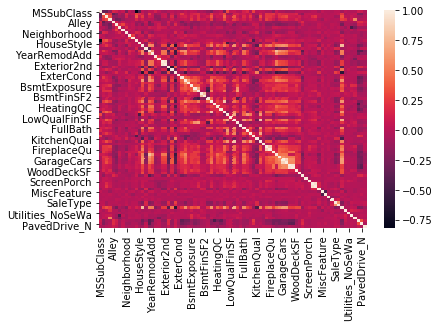

In [157]:
sns.heatmap(data.corr())
# В целом многие признаки являются независимыми, однако схожие между собой признаки
# все-таки имеют прямую линейную зависимость (пусть и небольшую)
# Также есть признаки, которые напрямую зависят сразу от нескольких других признаков 
# (из-за чего график напоминает клетчатый узор)

## 5

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

Наибольшая корреляция с признаком OverallQual, наименьшая - с ExterQual


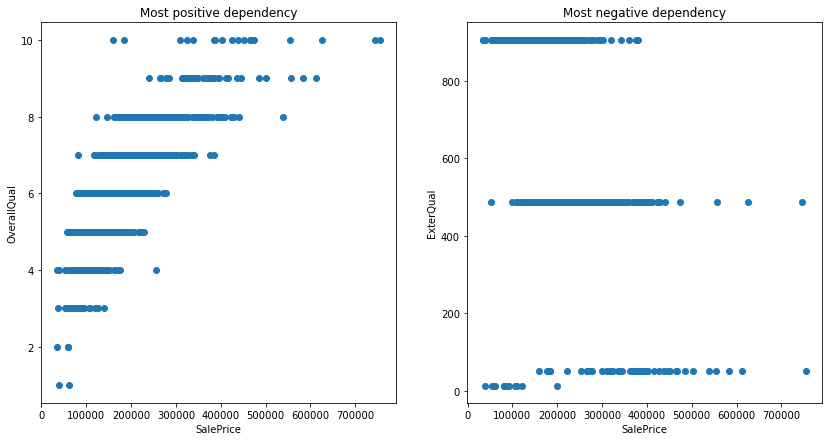

In [163]:
data_corr = data.corr()
data_except_price = data_corr['SalePrice'][data_corr['SalePrice'].index != 'SalePrice']
max_corr = data_except_price[data_except_price == data_except_price.max()].index
min_corr = data_except_price[data_except_price == data_except_price.min()].index
print(f'Наибольшая корреляция с признаком {max_corr[0]}, наименьшая - с {min_corr[0]}')

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(data['SalePrice'].values, data[max_corr].values)
plt.xlabel('SalePrice')
plt.ylabel(max_corr[0])
plt.title('Most positive dependency')

plt.subplot(1,2,2)
plt.scatter(data['SalePrice'].values, data[min_corr].values)
plt.xlabel('SalePrice')
plt.ylabel(min_corr[0])
plt.title('Most negative dependency')

plt.show()

## 6

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

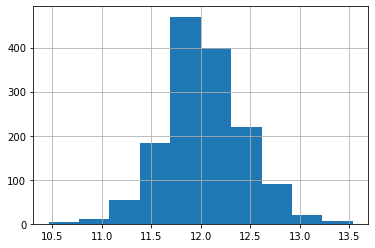

In [167]:
norm_price = data.SalePrice.apply(lambda x: np.log1p(x))
norm_price.hist()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [235]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('SalePrice', axis=1),
    np.log1p(data['SalePrice']),
    random_state=13
)

In [169]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 81), (365, 81), (1095,), (365,))

## 7

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [186]:
# Для лучшей работы алгоритмов можно нормализовать данные
# scaler = StandardScaler()
# X_train, X_val = scaler.fit_transform(X_train), scaler.fit_transform(X_val)

In [237]:
knn_grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 26, 2),
        'weights': ['uniform', 'distance'],
        'p': [1, 2, 3]
    },
    cv=5
)

lin_grid_searcher = GridSearchCV(
    LinearRegression(),
    param_grid={},
    cv=5
)

lasso_grid_searcher = GridSearchCV(
    Lasso(),
    param_grid={
        'alpha': [0.001 + i / 1000 for i in range(1000)]
    },
    cv=5
)

ridge_grid_searcher = GridSearchCV(
    Ridge(),
    param_grid={
        'alpha': [0.01 + i / 100 for i in range(1000)]
    },
    cv=5
)

knn_grid_searcher.fit(X_train, y_train)
print(knn_grid_searcher.best_params_)

lin_grid_searcher.fit(X_train, y_train)
print(lin_grid_searcher.best_params_)

lasso_grid_searcher.fit(X_train, y_train)
print(lasso_grid_searcher.best_params_)

ridge_grid_searcher.fit(X_train, y_train)
print(ridge_grid_searcher.best_params_)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
{}
{'alpha': 0.001}
{'alpha': 0.4}


In [249]:
knn = KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
lin = LinearRegression()
lasso = Lasso(alpha=0.001)
ridge = Ridge(alpha=0.4)

knn.fit(X_train, y_train)
lin.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

knn_pred = knn.predict(X_val)
lin_pred = lin.predict(X_val)
lasso_pred = lasso.predict(X_val)
ridge_pred = ridge.predict(X_val)

print(mean_squared_error(y_val, knn_pred, squared=False))
print(mean_squared_error(y_val, lin_pred, squared=False))
print(mean_squared_error(y_val, lasso_pred, squared=False))
print(mean_squared_error(y_val, ridge_pred, squared=False))
# Как ни странно, лучшим получился метод ближайших соседей

0.20573769021982166
0.22099437467355337
0.22276906737290322
0.22086650132522484


## 8 

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

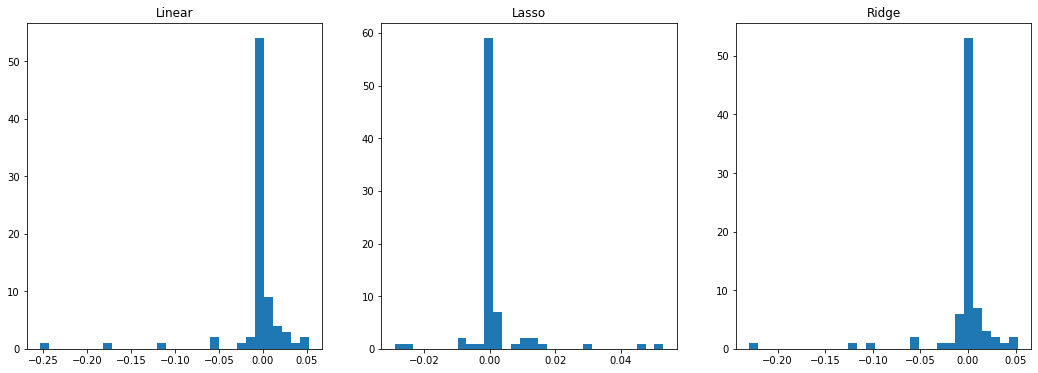

In [250]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.hist(lin.coef_, bins=30)
plt.title('Linear')
plt.subplot(1,3,2)
plt.hist(lasso.coef_, bins=30)
plt.title('Lasso')
plt.subplot(1,3,3)
plt.hist(ridge.coef_, bins=30)
plt.title('Ridge')
plt.show()
# У линейной модели разброс значений весов получился больше, по сравнению с моделями Лассо и Риджа